In [3]:
import sys
sys.executable

'/nesi/nobackup/niwa00013/williamsjh/miniconda3/envs/life/bin/python'

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import animatplot as amp

import warnings
warnings.filterwarnings("ignore")


In [239]:
def findneighbours(size, array):

    Nn = np.zeros(shape = (size,size))#number of neighbours

    for i in range(size):

        for j in range(size):

            Nn[i,j] = np.sum( [

                array[i-1, j-1], 
                array[i, j-1], 
                array[i+1-size*(i==size-1), j-1],

                array[i-1, j],
                array[i+1-size*(i==size-1), j],

                array[i-1, j+1-size*(j==size-1)],
                array[i, j+1-size*(j==size-1)],
                array[i+1-size*(i==size-1), j+1-size*(j==size-1)]                    

            ])

    return Nn

In [240]:
def applyrules(size,Nn, array):
    for i in range(size):
        for j in range(size):
            if array[i,j]==1:
                if Nn[i,j] < 2:# Any live cell with fewer than two
                               #live neighbours dies, as if by underpopulation.
                    array[i,j] = 0
                elif Nn[i,j] == 2:# Any live cell with two or three
                                                      # live neighbours lives on to the next generation.
                    array[i,j] = 1
                elif Nn[i,j] == 3:
                    array[i,j] = 1
                elif Nn[i,j] > 3:# Any live cell with more than three
                                 # live neighbours dies, as if by overpopulation.
                    array[i,j] = 0
            if array[i,j]==0:
                if Nn[i,j] == 3:# Any dead cell with exactly three
                                #live neighbours becomes a live cell, as if by reproduction.
                    array[i,j] = 1
                    
    return array

In [241]:
def plotarray(size, x):

    plt.pcolormesh(np.arange(size), np.arange(size),x, cmap = 'Greys')

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    ax.tick_params(axis=u'both', which=u'both',length=0)

    return myplot

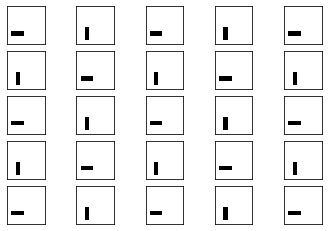

In [242]:
#oscillator

size = 10

array = np.zeros(shape = (size,size))

array[1:4, 2] = 1
array = array.astype(int)

gens = 25

for i in range(gens):

    Nn = findneighbours(size, array)
    array = applyrules(size,Nn, array)

    ax = plt.subplot(np.sqrt(gens),np.sqrt(gens),i+1, aspect = 'equal')
    
    plotarray(size, array)

plt.show();